<a href="https://colab.research.google.com/github/JoshK68/EfficientNet_Whale_classification/blob/main/Classification_EfficientNet_Whale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('drive/MyDrive/Datasets/Whale_classification/train (1).zip (Unzipped Files)'):
    print(filenames)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)

In [6]:
df = pd.read_csv('drive/MyDrive/Datasets/Whale_classification/train.csv')
df

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
...,...,...
9845,ffe5c306.jpg,w_2ceab05
9846,ffeaa7a4.jpg,w_b067417
9847,ffecec63.jpg,w_8b56cb1
9848,fff04277.jpg,w_2dcbf82


In [7]:
#Print the number of missing images/ids
df.isna().sum()

Image    0
Id       0
dtype: int64

In [8]:
IMAGES_DIR = 'drive/MyDrive/Datasets/Whale_classification/train (1).zip (Unzipped Files)'

In [9]:
IMAGES_DIR

'drive/MyDrive/Datasets/Whale_classification/train (1).zip (Unzipped Files)'

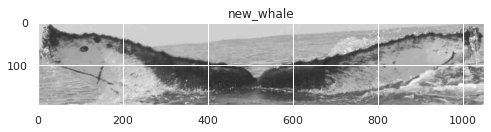

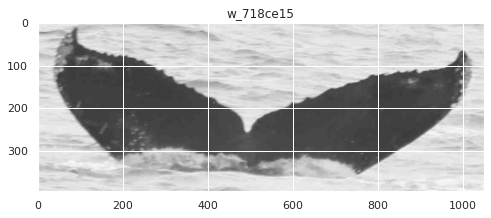

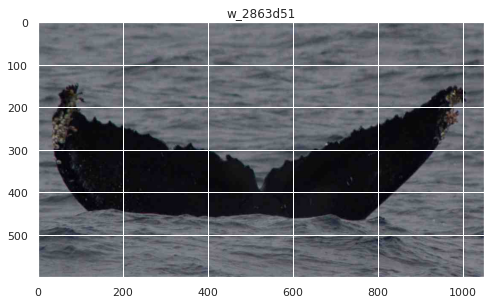

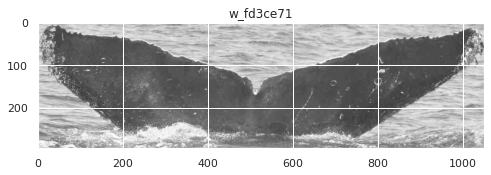

In [10]:
NUM_IMAGES_TO_PLOT = 4
image_filenames = os.listdir(IMAGES_DIR) #turns it into a list/iterable?

#print(images_filenames)

for i in range(NUM_IMAGES_TO_PLOT):

  image_filename = image_filenames[i] ###iterate through list of images
  image_path = os.path.join(IMAGES_DIR, image_filename) #joining the directory with the filename(c0ce00c4.jpg)
  image_np = plt.imread(image_path)
  whale_id = df.query(f"Image == '{image_filename}'").Id.item() #### .ID.item() -dict

  plt.subplots(figsize=(8,6))
  plt.imshow(image_np)
  plt.title(whale_id)

In [11]:
### Discover if there are any outlier Whales by counting how many times each appears

df2 = df.groupby('Id').agg('count').rename({'Image': 'NumImages'}, axis=1)  ##axis=1
df2.sort_values('NumImages', ascending=False, inplace=True)
df2

,NumImages
Id,
new_whale,810
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
...,...
w_7e48479,1
w_7e728d8,1
w_7e8305f,1


In [12]:
#identified 'new_whale' as a significant outlier
#view images of new_whale and discover if new_whale is perhaps many different whales
#decide how to treat new_whale

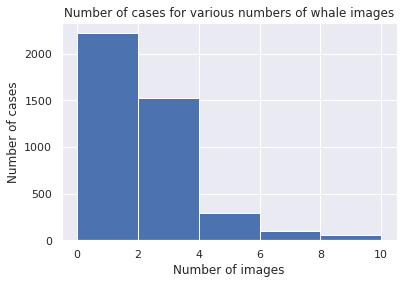

In [13]:
#We'll use df2 which we just created and is grouped by 'Id' and aggregated by 'count'

plt.figure(figsize=(6, 4))
df2.NumImages.hist(bins=list(range(0, 11, 2)))
plt.title('Number of cases for various numbers of whale images')

plt.xlabel('Number of images')
plt.ylabel('Number of cases')
plt.show();

####How does it know to put number of images on the X and number of cases on the Y axis?

In [14]:
#B/c 'new_whale' seems to be many different whales grouped together, let's remove it

df2.drop('new_whale', inplace=True)
df2

,NumImages
Id,
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
w_fd1cb9d,22
...,...
w_7e48479,1
w_7e728d8,1
w_7e8305f,1


In [15]:
## Filter (and leave) only those Whale IDs, for which the number of corresponding images is greater than NUM_IMAGES_THRESHOLD

NUM_IMAGES_THRESHOLD = 20

df3 = df2.query(f'NumImages > {NUM_IMAGES_THRESHOLD}')

print('shape', df3.shape)
print('total number of images:', df3.NumImages.sum())
df3

shape (10, 1)
total number of images: 239


,NumImages
Id,
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
w_fd1cb9d,22
w_ab4cae2,22
w_693c9ee,22
w_987a36f,21
w_43be268,21


In [16]:
df3.index

Index(['w_1287fbc', 'w_98baff9', 'w_7554f44', 'w_1eafe46', 'w_fd1cb9d',
       'w_ab4cae2', 'w_693c9ee', 'w_987a36f', 'w_43be268', 'w_73d5489'],
      dtype='object', name='Id')

In [17]:
#Obtain a dataframe containing entries only for the filtered whale IDs.

ids_to_leave = list(df3.index)

filtered_df = df.query(f'Id in {ids_to_leave}')
filtered_df

,Image,Id
1,000466c4.jpg,w_1287fbc
13,00467ae9.jpg,w_fd1cb9d
104,02916b71.jpg,w_73d5489
183,0496e682.jpg,w_fd1cb9d
253,0603a403.jpg,w_1287fbc
...,...,...
9464,f61f4cb3.jpg,w_ab4cae2
9518,f767cdfa.jpg,w_1eafe46
9643,fa8ed4af.jpg,w_43be268
9681,fb881c99.jpg,w_43be268


In [19]:
#Remove the image with the ship - good idea to create a boundary box?

filtered_df.drop(filtered_df.query("Image == '496b52ff.jpg'").index, axis=0, inplace=True)
filtered_df           ### axis=0

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Image,Id
1,000466c4.jpg,w_1287fbc
13,00467ae9.jpg,w_fd1cb9d
104,02916b71.jpg,w_73d5489
183,0496e682.jpg,w_fd1cb9d
253,0603a403.jpg,w_1287fbc
...,...,...
9464,f61f4cb3.jpg,w_ab4cae2
9518,f767cdfa.jpg,w_1eafe46
9643,fa8ed4af.jpg,w_43be268
9681,fb881c99.jpg,w_43be268


In [20]:
#Next let's split the data into train and test (validation) sets
#usually we use train_test_split - let's use StratifiedShuffleSplit here because can create a more balance split

from sklearn.model_selection import StratifiedShuffleSplit

X, y = filtered_df.Image, filtered_df.Id    ####
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
train_indices, test_indices = list(splitter.split(X, y))[0]

print('shapes:', train_indices.shape, test_indices.shape)

shapes: (178,) (60,)


In [21]:
#print(list(splitter.split(X, y))[0])

In [22]:
#Check if there is an equal number of unique whale ids in the training and test set.

train_df = filtered_df.iloc[train_indices] #use iloc b/c seaching by number/index num
test_df = filtered_df.iloc[test_indices]

train_df.Id.nunique() == test_df.Id.nunique()

True

In [23]:
train_entries_counts = train_df.Id.value_counts().sort_index() ###Go into train_df then Id then get the value_counts then sort based on index
test_entries_counts = test_df.Id.value_counts().sort_index()

print('percentage of entries:')
print(test_entries_counts / train_entries_counts) #percentage

percentage of entries:
w_1287fbc    0.360000
w_1eafe46    0.352941
w_43be268    0.312500
w_693c9ee    0.294118
w_73d5489    0.312500
w_7554f44    0.368421
w_987a36f    0.312500
w_98baff9    0.368421
w_ab4cae2    0.375000
w_fd1cb9d    0.294118
Name: Id, dtype: float64


In [24]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [25]:
TRAIN_DIR = 'drive/MyDrive/Datasets/Whale_classification/train (1).zip (Unzipped Files)'

#Specify how you'd like to transform/augment the image here:

datagen = ImageDataGenerator(featurewise_center=True, zca_whitening=True, rescale=1./255,
                             rotation_range=True, width_shift_range=0.2, height_shift_range=0.2)


BATCH_SIZE = 32
TARGET_SIZE = (224, 224) #Height Width

####Flow from df vs flow from directory
train_set_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_DIR,    #flowing from TRAIN_DIR - TRAIN_DIR = 'drive/MyDrive/Datasets/Whale_classification/train (1).zip (Unzipped Files)'
    x_col = 'Image',
    y_col = 'Id',
    target_size = TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' #In case you have more than 2 classes, use class_mode='categorical' and categorical_crossentropy
)

###datagen is the augmented image
test_set_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=TRAIN_DIR,
    x_col = 'Image',
    y_col = 'Id',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' # ensures one-hot encoding of class labels
)


Found 153 validated image filenames belonging to 10 classes.
Found 46 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 25 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 14 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Plot some augmented datagen

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


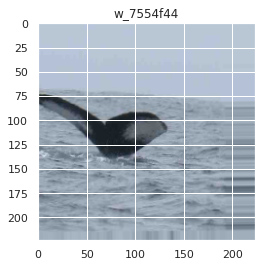

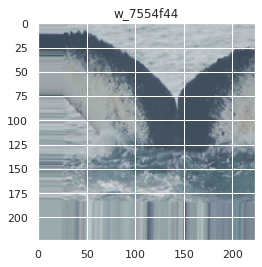

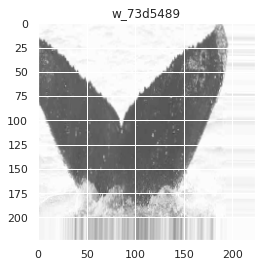

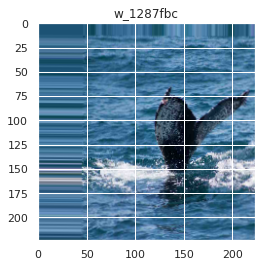

In [26]:
NUM_IMAGES_TO_PLOT = 4

#The images are in training_set_generator created right above
for X, y in train_set_generator:    ####I believe that X is the images???
  break
  ####print(X)

#Get a list of unique whale IDs:

unique_whale_ids = train_df.Id.unique()
#print(unique_whale_ids)

images_subbatch = X[:NUM_IMAGES_TO_PLOT]  #from the first up to the 4th image
one_hot_class_labels_subbatch = y[:NUM_IMAGES_TO_PLOT]

for image, one_hot_class_labels in zip(images_subbatch, one_hot_class_labels_subbatch): #zipping them together

  plt.subplots()
  plt.imshow(image)
  whale_id = unique_whale_ids[np.argmax(one_hot_class_labels)] ####argmax to get the most likely class
  plt.title(whale_id)
  plt.show()

In [27]:
#print(image, one_hot_class_labels)  
#argmax on one_hot_class_labels to get the most likely

In [28]:
#np.argmax(one_hot_class_labels)

In [29]:
from keras.applications.efficientnet import EfficientNetB0

# Form the correct input shape for the model in case the `TARGET_SIZE` 
# is not square (e.g. (224, 224)).
INPUT_SHAPE = (TARGET_SIZE[0], TARGET_SIZE[1], 3)

base_model = EfficientNetB0(
    weights='imagenet',  # load weights pretrained on the ImageNet
    include_top=False,  # do not include the ImageNet classifier at the top
    input_shape=INPUT_SHAPE,
    pooling='max'  # add a global max pooling layer after the base model
)

base_model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [30]:
from keras.layers import Dropout, Dense

#Freeze the base model so that only the top layers are trained.

base_model.trainable = False

num_classes = len(unique_whale_ids)

model = keras.Sequential([base_model,
                          Dropout(0.2),
                          Dense(128, activation='relu'),
                          Dropout(0.2),
                          Dense(num_classes, name='predictions')])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 10)                1290      
                                                                 
Total params: 4,214,829
Trainable params: 165,258
Non-trainable params: 4,049,571
_________________________________________________________________


In [32]:
import tensorflow as tf

In [34]:
#Fixed this: https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class

In [50]:
###Train only the new top layers of the model

from keras.losses import categorical_crossentropy

EPOCHS = 30

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_set_generator,
                    epochs=EPOCHS,
                    validation_data=test_set_generator,  #this is the augmented data
                    verbose=1)

#### from_logits = so basically what it means is if softmax layer is not being added at the last layer then we need to have the from_logits=True to indicate the probabilities are not normalized ,

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
5/5 [==============================] - 10s 1s/step - loss: 6.2964 - accuracy: 0.1111 - val_loss: 2.3286 - val_accuracy: 0.1304
Epoch 2/30
5/5 [==============================] - 3s 687ms/step - loss: 2.4059 - accuracy: 0.1176 - val_loss: 2.3024 - val_accuracy: 0.1304
Epoch 3/30
5/5 [==============================] - 3s 688ms/step - loss: 2.3086 - accuracy: 0.1634 - val_loss: 2.3024 - val_accuracy: 0.1304
Epoch 4/30
5/5 [==============================] - 3s 698ms/step - loss: 2.2960 - accuracy: 0.1438 - val_loss: 2.3023 - val_accuracy: 0.1304
Epoch 5/30
5/5 [==============================] - 3s 698ms/step - loss: 2.3125 - accuracy: 0.1438 - val_loss: 2.3023 - val_accuracy: 0.1304
Epoch 6/30
5/5 [==============================] - 3s 694ms/step - loss: 2.3114 - accuracy: 0.1438 - val_loss: 2.3185 - val_accuracy: 0.0652
Epoch 7/30
5/5 [==============================] - 3s 710ms/step - loss: 2.3301 - accuracy: 0.1373 - val_loss: 2.3021 - val_accuracy: 0.1304
Epoch 8/30
5/5 [======

Apply fine-tuning, that is, unfreeze the base model and train the whole model with a small learning rate

In [35]:
base_model.trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 10)                1290      
                                                                 
Total params: 4,214,829
Trainable params: 4,172,806
Non-trainable params: 42,023
_________________________________________________________________


In [42]:
base_model.trainable = True

#Freeze all layers except for the last 10:
for layer in base_model.layers[:-10]: #don't grab the last 10
  layer.trainable = False

# Recompile the model (always recompile after any adjustment to a model)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5),  # set the learning rate to a low value
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [48]:
###compiled...now fit

In [46]:
fine_tuning_history = model.fit(train_set_generator, 
                                epochs=FINE_TUNING_EPOCHS,
                                validation_data=train_set_generator,
                                verbose=2  # don't display the progress bar
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
5/5 - 12s - loss: 13.8097 - accuracy: 0.0980 - val_loss: 5.4989 - val_accuracy: 0.0980 - 12s/epoch - 2s/step
Epoch 2/30
5/5 - 5s - loss: 13.7334 - accuracy: 0.1242 - val_loss: 5.2326 - val_accuracy: 0.0980 - 5s/epoch - 1s/step
Epoch 3/30
5/5 - 5s - loss: 12.3302 - accuracy: 0.0850 - val_loss: 4.9474 - val_accuracy: 0.0980 - 5s/epoch - 1s/step
Epoch 4/30
5/5 - 5s - loss: 12.6843 - accuracy: 0.0850 - val_loss: 4.6891 - val_accuracy: 0.0980 - 5s/epoch - 1s/step
Epoch 5/30
5/5 - 5s - loss: 11.6536 - accuracy: 0.1111 - val_loss: 4.4657 - val_accuracy: 0.0980 - 5s/epoch - 1s/step
Epoch 6/30
5/5 - 5s - loss: 11.0205 - accuracy: 0.0980 - val_loss: 4.2988 - val_accuracy: 0.0980 - 5s/epoch - 996ms/step
Epoch 7/30
5/5 - 5s - loss: 10.8831 - accuracy: 0.1111 - val_loss: 4.1672 - val_accuracy: 0.0980 - 5s/epoch - 998ms/step
Epoch 8/30
5/5 - 5s - loss: 10.4644 - accuracy: 0.1307 - val_loss: 4.0586 - val_accuracy: 0.0980 - 5s/epoch - 995ms/step
Epoch 9/30
5/5 - 5s - loss: 10.2553 - accurac

In [43]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [44]:
#How many trainable variables do we have now?

print(len(base_model.trainable_variables))

10


In [45]:
#Excellent_Looks like our model has a total of 10 trainable variables.
#the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

#Time to fine-tune!

Plot the training history

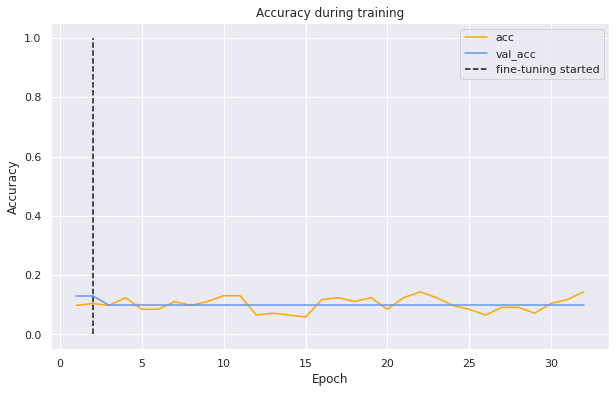

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fine_tuning_acc = fine_tuning_history.history['accuracy']
fine_tuning_val_acc = fine_tuning_history.history['val_accuracy']

top_layers_training_epochs = list(range(1, EPOCHS + 1))
fine_tuning_epochs = list(range(EPOCHS + 1, 
                                EPOCHS + FINE_TUNING_EPOCHS + 1))

ax = plt.figure(figsize=(10, 6))

plt.plot(top_layers_training_epochs, acc, label='acc', color='orange')
plt.plot(top_layers_training_epochs, val_acc, label='val_acc', 
         color='cornflowerblue')

plt.plot(fine_tuning_epochs, fine_tuning_acc, color='orange')
plt.plot(fine_tuning_epochs, fine_tuning_val_acc, color='cornflowerblue')
plt.plot([EPOCHS, EPOCHS + 1], [acc[-1], fine_tuning_acc[0]], 
         color='orange')


plt.plot([EPOCHS, EPOCHS + 1], [val_acc[-1], fine_tuning_val_acc[0]], 
         color='cornflowerblue')

plt.vlines(EPOCHS, ymin=0, ymax=1, linestyles='dashed',
           label='fine-tuning started')

plt.legend(loc='best')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


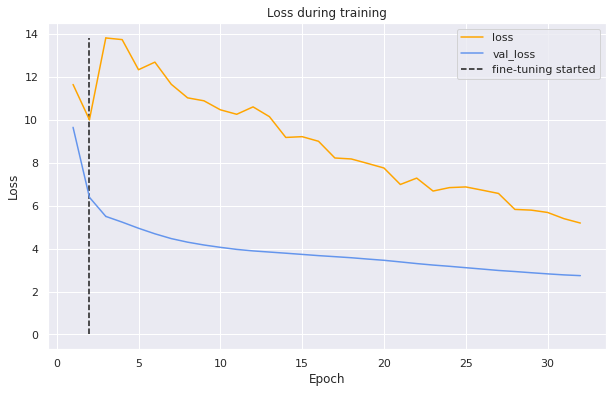

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']

fine_tuning_loss = fine_tuning_history.history['loss']
fine_tuning_val_loss = fine_tuning_history.history['val_loss']

top_layers_training_epochs = list(range(1, EPOCHS + 1))

ax = plt.figure(figsize=(10, 6))

plt.plot(top_layers_training_epochs, loss, label='loss', color='orange')
plt.plot(top_layers_training_epochs, val_loss, label='val_loss', 
         color='cornflowerblue')

plt.plot(fine_tuning_epochs, fine_tuning_loss, color='orange')
plt.plot(fine_tuning_epochs, fine_tuning_val_loss, color='cornflowerblue')
plt.plot([EPOCHS, EPOCHS + 1], [loss[-1], fine_tuning_loss[0]], 
         color='orange')

plt.plot([EPOCHS, EPOCHS + 1], [val_loss[-1], fine_tuning_val_loss[0]], 
         color='cornflowerblue')

max_loss = max(max(loss), max(val_loss), 
               max(fine_tuning_loss), max(fine_tuning_val_loss))

plt.vlines(EPOCHS, ymin=0, ymax=max_loss, linestyles='dashed', 
           label='fine-tuning started')

plt.legend(loc='best')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()